# Lab 5 - Exploratory Data Analysis - Solution

In [1]:
%matplotlib inline

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Canvas submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. You *must* follow the framework discussed in the Module for a *methodical* EDA:

1. Single Variable Exploration.
2. Exploration of Pairwise Relationships.

Each and every analysis (of a single variable or a pair of variables) should follow the general pattern of discuss/code/discuss. If you need examples for EDA, look at the Example in *Fundamentals*. 

In order to guide the EDA, you can take the following as the main question:

> What are the factors influencing charges?

Using that problem as a guide, explore 5 pairwise relationships. Because you have a question, you should *not* use correlations as a *guide* to exploration (however, correlation coefficients are still reasonable descriptive statistics for two numeric variables).

As you explore those pairings, questions will arise, "I wonder if...." or "I wonder about...". Make note of them. **Do not get distracted**. As a rough guide, you should get three (3) questions out of every single or pairwise exploration. As a result, you should have at least 15 of them when you're done (plus all the questions you generated looking at each variable individually!).

Pick five (5) of *those* questions and answer them.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. 

The emphasis here is on *science*.

At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

BTW, do not literally say "Why am I doing this?"...these questions are just *prompts* or *scaffolding*.

For now, you shouldn't just "change" anything. Let's say you start with 10 bins in your histogram. You decide you want to see what happens with 20. **Do not just change the value to 20**. Instead, make a new histogram with 20 bins, documenting why you thought 20 bins might be better, what you hoped to see, and then what you saw as a result of doing it.

(Believe me, there will be a time when a boss says "did you try 10 bins?" and you'll say "yes" but you won't remember what it looked like or they'll want to see it and you'll have to do it all again anyway. Your notebook is a documentation of *everything* you tried.)

Be inventive and creative.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>This solution is based on the Module overview where I made amendments to the process. Please study the Solution carefully. We will have multiple opportunities to conduct EDA and you must follow this format.</p>
</div>

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

# Answer

The file `insurance.csv` contains data about insurance charges as well as some basic demographic (age, sex, US region) and lifestyle (BMI, smoker) data. The variables are charges, age, sex, bmi, children, smoker, and region.

The question or problem is to determine if charges has any relationship with the other values. This exploratory data analysis is just the first step. We will first look at the patterns in each individual variable and then look to see if there are any patterns between charges and any of the other variables.

We start by loading the data.

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv", header=0)

We'll look at the overall characteristics of the data to make sure it loaded correctly. First, let's get the basic data frame info:

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 records (or observations) for each variable so there are no missing values. there are 4 numerical variables and what appears to be 3 categorical variables. Let's look at the first few rows:

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are two interesting things here. First, the BMI is measured with great precision (3 decimal places). The same is true of charges as well which seems "off". The precision looks to measure one 10,000-th of a cent.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Notes</strong>
        <ol>
        <li>This starting section should include only "ETL in the Small". You are not describing your data, relating domain knowledge or anything else. You're just trying to see if the data is loaded properly, if there are missing values, etc.
            <li>Some are tempted to do an overall <tt>describe</tt> here. Don't. The EDA hasn't started yet.
            </li>
</div>

In [6]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You probably don't have these functions. What happened was, I did this more than twice so I went back and created a function to do it. If I start doing it repeatedly, I'll add it to an EDA library.</p>
</div>

In [7]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()
    return h

In [8]:
def histogram_trio(data, variable_name, zoom=1.0):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

# EDA

## Single Variable EDA

We'll start our EDA by looking at each variable individually, starting with the target variable, *charges*.

<a id="contents"></a>

* [charges](#charges)
* [age](#age)
* [sex](#sex)
* [bmi](#bmi)
* [children](#children)
* [smoker](#smoker)
* [region](#region)


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>You should include links like this in your notebook to make it easy to navigate. Look at the markdown and see how it was accomplished.</p>
</div>

<a id="charges"></a> 

## Charges

Charges are the main variable of interest and represent health insurance charges by the persons in the database.
Charges is numeric and measured in US dollars.
We would expect for there to be a lot of smaller charges and a few very large bills.

Here are the descriptive statistics:

In [9]:
insurance.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

The mean is \\$13,270 and the median is \\$9,382, or about 30% lower. 
The variable is definitely skewed. 
The 3rd quartile (\\$16,640) is nearly 4x the 1st quartile (\\$4,740), with an Inter-Quartile Range (IQR) of \\$11,899.
The minimum is \\$1,121 while the maximum is \\$63,770 nearly 64x larger.

Here's a histogram using Freeman-Diaconis bins and supported by a box-and-whiskers plot so we can see any extreme values:

Freeman Diaconis for charges: 29 bins


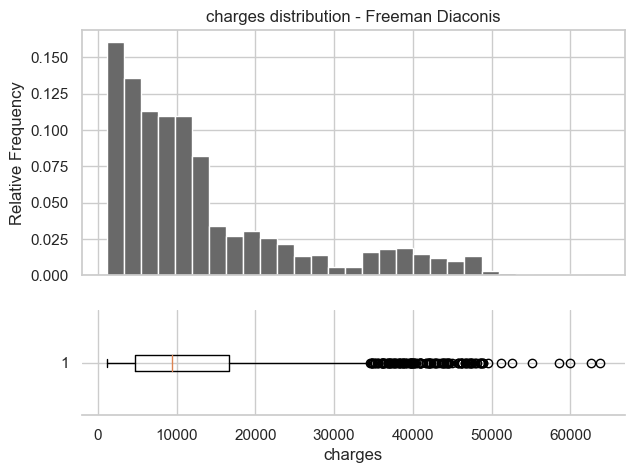

In [10]:
charge_bins = histogram_w_whiskers(insurance, "charges")

The distribution doesn't look very regular.
As we hypothesized, there are many small charges around \\$10,000 and fewer very large charges.
However, there seem to be a few additionall peaks at \\$20,000 and \\$40,000.
There may be a number of factors influencing these sub-groups of charges that is creating a mixture of distributions. 

Here are histograms with half as many and twice as many bins to help sort out signal and noise:

Freeman Diaconis for charges: 29 bins


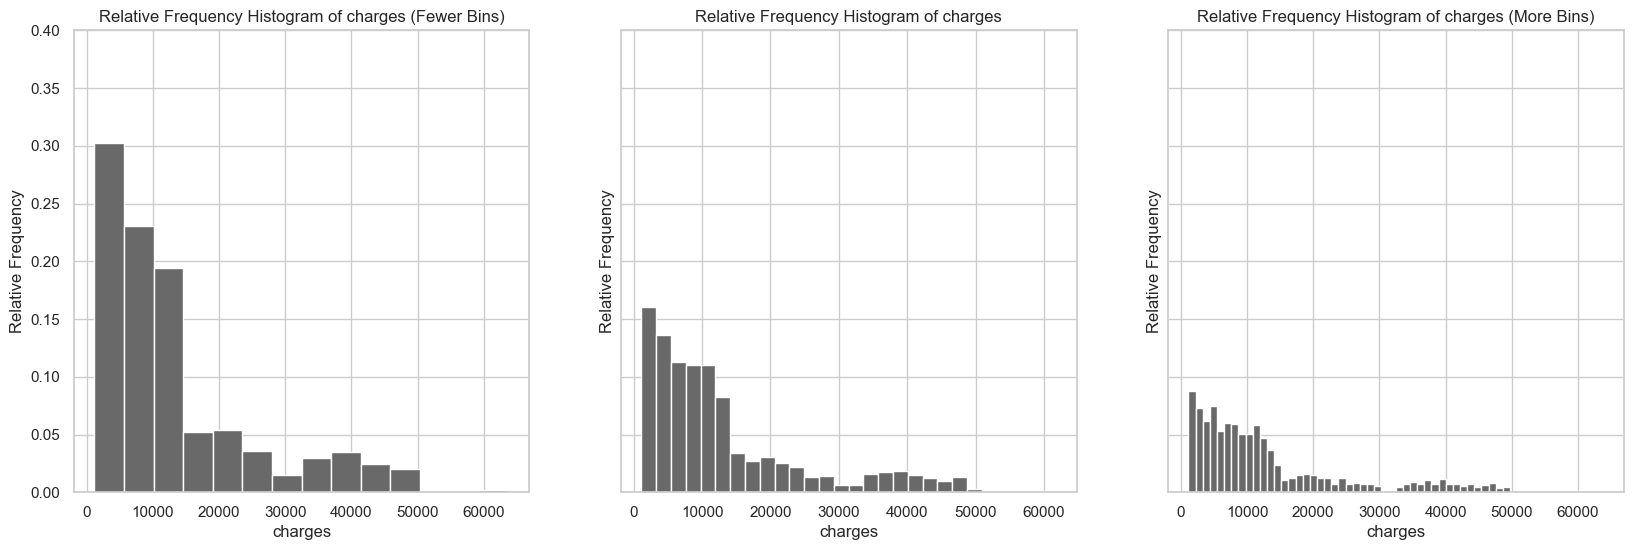

In [11]:
histogram_trio(insurance, "charges", zoom=0.4)

The overall shape of the distribution is persistent with both fewer and more bins.
There are more smaller charges and fewer large charges.
With more bins, the peaks around \\$20,000 and \\$40,000 have more definition.
They don't seem to be noise.

1. It looks like charges contains at least three subgroups. As we complete the EDA, we should be looking out for any variables that might explain these sub-groups.
2. .
3. .

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Notes</strong>
    <ol>
    <li>The overall exploration follows the discuss/code/discuss pattern for each code block.</li>
    <li>We start with a discussion of the variable, it's type, domain knowledge, and a hypothesis.</li>
    <li>We calculate the summary/descriptive statistics and then discuss them citing <em>specific numbers</em>.</li>
    <li>We start with a Freeman-Diaconis histogram supported by a Box-and-Whiskers plot. The second was not required but it was hinted at. The ability to craft your own plots is why we use a low level library like <tt>matplotlib</tt>.</li>
    <li>We don't say "this doesn't look normally distributed". We'll find out why in the next module. We only talk about general shapes.</li>
    <li>We don't transform the variable to try to make it "normally distributed". This isn't appropriate. (We'll talk more about this later).</li>
    <li>We looked at two additional histograms with both fewer and more bins to see if we could sort out what might be signal and what might be noise.</li>
    <li>We discussed our findings and made notes.</li>
    <li>Do not copy these words verbatim. Because I concentrated on certain things comes from analysis and looking at certain things. They are not an indication that you should always do this or that and say exactly this or that.</li>
        <li>When you plot histograms next to each other, make sure they have the same y-axis scale. It would probably better to plot these as relative frequencies, which is a bit more involved. The other alternative to counts is densities, which are weird because they're difficult to explain.</li>
        <li><strong>Why don't the histograms go to 1?</strong> That's a really good question. Whether the histograms are counts, relative frequencies, or densities, they're all going to have the same shape. If we use density, we can see detail but we loose interpretability (who can visually interpret density?). We use counts, we lose comparability. Histograms are a well known visualization...we know that the area sums to the total (either the total count or 1. Even densities sum to 1). As such, I think we can rely on that established history to bend a rule. Just this once. <em>If you didn't use relative frequency, that's ok.</em> It's my prefrence to use relative frequency.</li>
    </ol>
    <p><strong>One really good test of your discussion quality is to use Jupyter's ability to hide the code and outputs. Do it know. You should see that your discussion still makes sense with all the code, tables, and charts missing.</strong></p>
</div>

<a id="age"></a>

## Age

Age is a numeric variable indicating the age of the insured. 
The data probably doesn't include minors so the minimum should be about 18.
Additionally, it probably won't include adults over 65 because of Medicare.
Within those ages, we expect the data to be distributed approximately the same as the US population at large.
According to data for 2000 from [CensusScope](http://www.censusscope.org/us/chart_age.html) it is somewhat expected for the US overall population actually fairly even within that age range.

![Population Pyramid](http://www.censusscope.org/us/chart_age_graph_1.gif)

Here are the summary statistics:

In [12]:
insurance.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The age range is what we expected.
The minimum age is 18.
The maximum age is 64.
This corresponds to the "Age of Majority" in the first case and Medicare eligibility in the second case.

Here is a histogram:

Freeman Diaconis for age: 12 bins


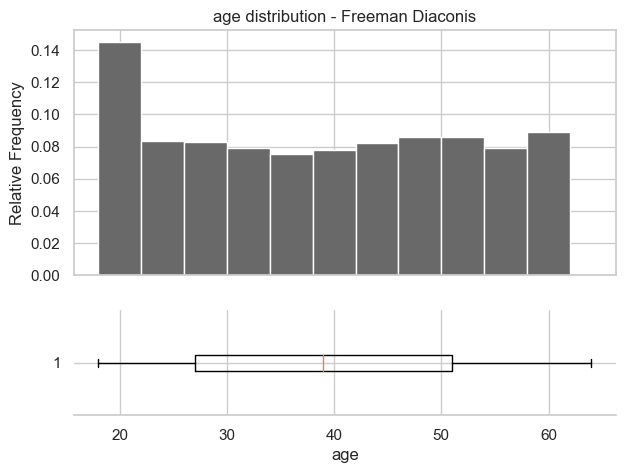

4

In [13]:
histogram_w_whiskers(insurance, "age")

There is a marked peak at 20, which seems unusual.
The counts for the other ages are all very nearly the same, although it does seem to go up around 50.


Here are histograms with half as many and twice as many bins to help sort out signal and noise:

Freeman Diaconis for age: 12 bins


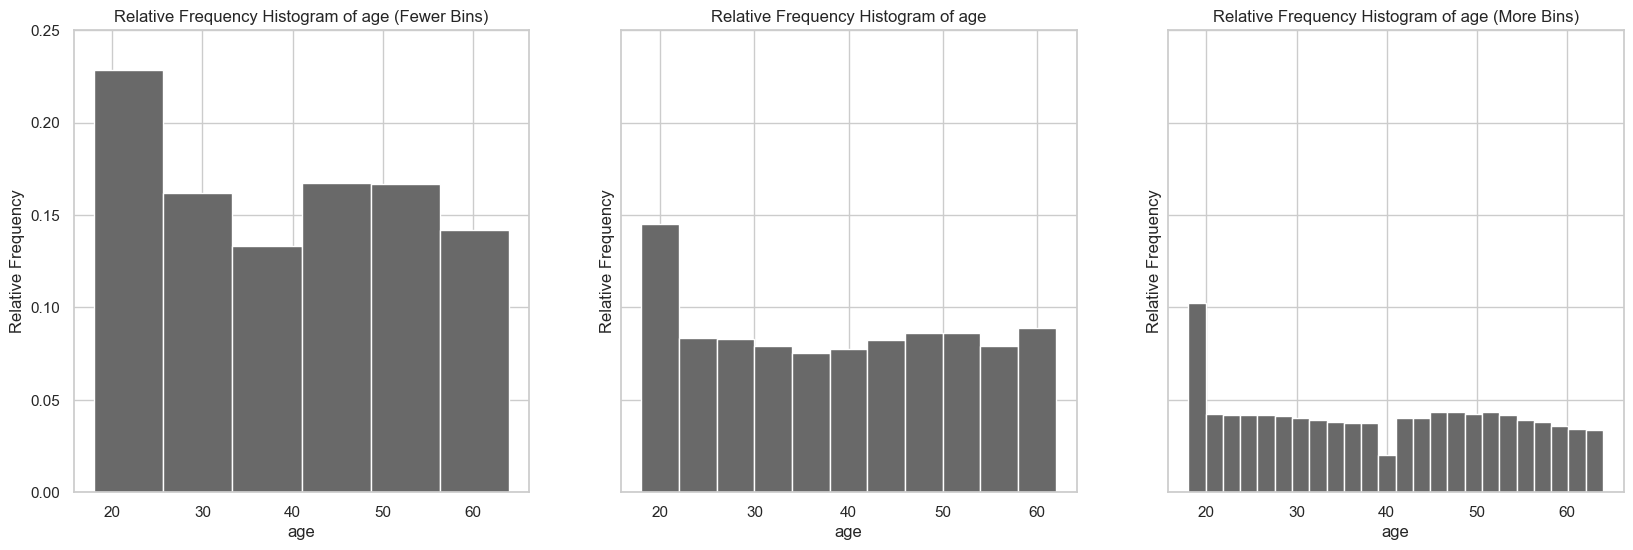

In [14]:
histogram_trio(insurance, "age", zoom=0.25)

The peak at 18 is fairly consistent regardless of bin size as is the trend with the rest of the years.
It looks like it goes down slightly from 20 to 39-ish.
There is a strange artifact at 40 years old.
There's a slight hump, going up then down after 40, centered at 50.
This seems consistent over both resolutions.

1. As one ages, there are likely to be more medical problems so when we look at age v. charges, we would expect to see a correlation of some kind.
2. It's not clear why there are so many 18-20 year olds and we may need to investigate this.
3. One challenge with the data is that it isn't about coverage but about claims.

## Sex

<a id="sex">Sex</a> is a categorical variable with values: male and female.
In a medical setting we will assume that this is biological sex.
We would expect the distribution to be 50/50, more or less, because it covers the entire age range. 
If the data were more about senior citizens, for example, we'd expect there to be more females than males.

Here is a count distribution:

In [15]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

There are almost exactly the same number of males and females in the data.

The influence of sex on charges seems uncertain because there are a number of life-style and cultural factors it work:

1. There may be more charges for females of child-bearing age.
2. There are gross concerns about women's symptoms not being taken seriously but men not seeking health care until the symptoms are serious. It's not immediately clear how that shakes out for charges.
3. Sex may combine with other risk factors such as smoking and BMI.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You don't need to do a whole lot in terms of charting for a single binary categorical variable.</p>
</div>

<a id="bmi"></a>
## BMI

BMI or Body Mass Index is one indicator of overall health. It is a numerical variable. According to Wikipedia, [BMI](https://en.wikipedia.org/wiki/Body_mass_index) is calculated as:

$$\frac{mass}{height^2}$$

The general classifications of BMI are:

![BMI](https://images.everydayhealth.com/images/heart-health/heart-failure/bad-news-if-your-bmi-is-high-fat-causes-heart-failure-1440x810.jpg?w=1110)

in $kg$/$m^2$.

Here are the summary statistics:

In [16]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

The minimum BMI is 15.96 and the maximum is 53.13 so there are definitely *extremes* in the data but the main concentration of data indicates that the data may be pretty symmetric. 
The mean is 30.7 and the median is nearly that at 30.4. 
The first quartile is 26.3 and the third quartile is 34.7, both about equidistant from the median/mean.

Here is a histogram:

Freeman Diaconis for bmi: 38 bins


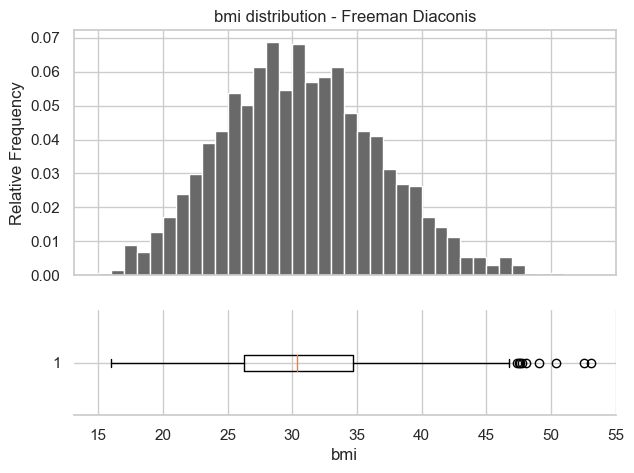

1

In [17]:
histogram_w_whiskers(insurance, "bmi")

The data looks only slightly skewed right which makes some sense. 
The box-and-whiskers plot indicate quite a few extreme values to the right.
There is lower bounds on both weight and height for most North American populations but not nearly the kind of upper bound on, at least, weight.


Here are histograms with half as many and twice as many bins to help sort out signal and noise:

Freeman Diaconis for bmi: 38 bins


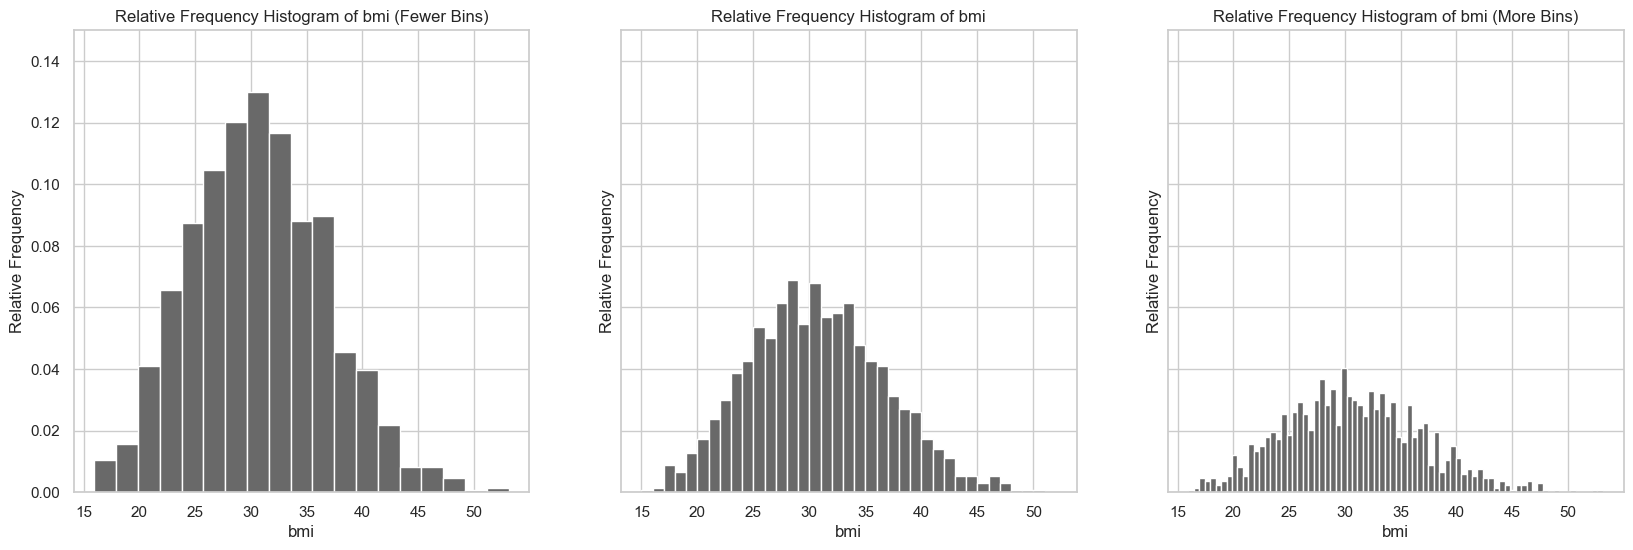

In [18]:
histogram_trio(insurance, "bmi", zoom=0.15)

The distribution looks consistently symmetric with perhaps a slight bulge towards the right.

1. BMI is not universally recognized as a health indicator because other factors can be involved.
2. One situation where BMI does not work is in athletes. We might need information on exercise and other habits.
3. However, BMI might gross be a good indicator of charges.

<a id="children"></a>
## Children

Children is the number of children the person has. 
Given the age range, there are probably many more persons with no children than 10. 
The count probably halves as you go from 0 to 1 to 2 to 3, etc., children.

According to [Statista](https://www.statista.com/statistics/183790/number-of-families-in-the-us-by-number-of-children/), in 2022, for the United States, the distributions where:

| Children  | Percent of Households |
|-----------|----------------------:|
| 0         |                  59.7 |
| 1         |                  17.1 |
| 2         |                  14.8 |
| 3 or more |                   8.4 |


Here are the summary statistics:

In [19]:
insurance.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Although we can't see the distribution here, the first quartile includes 0 children so at least 25% of the persons in the data are without children. Similarly, 75% have 2 or fewer children. It's somewhat surprising that the maximum family size is only 5 children.

The statistics would seem to suggest that the number of children is normally distributed because the mean and median are nearly equal and the interquartile range is symmetric but this doesn't seem reasonable. Because the number of children is so small, we can treat the data like a discrete, categorical variable.

Here is the frequency distribution:

In [20]:
insurance.children.value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

Here is a bar chart with relative frequencies:

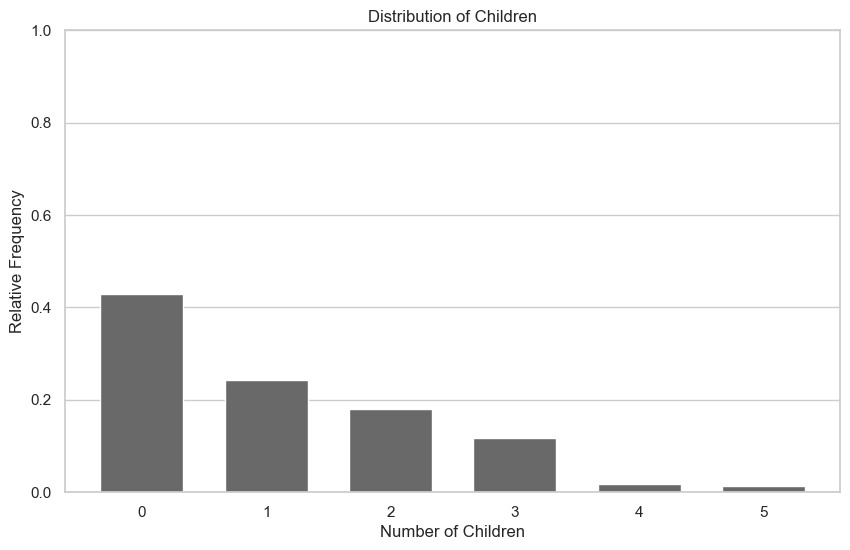

In [21]:
data = insurance.children.value_counts(normalize=True)
x = range( len( data))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, data, width, align="center", color="dimgray")
axes.set_xticks([0, 1, 2, 3, 4, 5])
axes.set_xticklabels(data.axes[0])
axes.set_ylim((0, 1))
axes.set_title( "Distribution of Children")
axes.set_xlabel("Number of Children")
axes.set_ylabel( "Relative Frequency")
axes.xaxis.grid(False)

plt.show()
plt.close()

It's not quite dropping by halves but it's close at the start. 
There are 42% with no children, 24% with 1, 18% with 2, 11% with 3. 
Then it drops abruptly to 2% with 4 children and 1% with 5.

However, there are more children than the US overall.
This could be because we're measuring people versus households or it could because people with children are more likely to get health care.

1. We might need to combine the higher numbers of children (3, 4, 5), because the number of observations is so small.
2. If we use children as an explanatory factor, we would need to clarify if charges *for the children* are included in the charges of the parent.
3. Children might combine with other factors in strange ways: if you have a child, you clean up your health habits, for example.

<a id="smoker"></a>
## Smoker

Smoker indicates if the person is a smoker. 
The data is categorical, so we need really only look at the possible values and the distribution.

There are only two outcomes, "yes" and "no". 
This is somewhat interesting as health forms usually distinguish between non-smokers, former smokers (and how long ago they quit), and current smokers. 
Is this representative of the US as a whole? [Prevalence of Tobacco Consumption](https://en.wikipedia.org/wiki/Prevalence_of_tobacco_consumption) shows that about 15.1% of the US population smoked in 2015.

Here are the relative frequencies:

In [22]:
insurance.smoker.value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In this data, 80% of the individuals do not smoke while 20% do smoke.
The data has a slightly higher proportion of smokers than the overall US population.

1. It seems like smoking should definitely correlate with charges.
2. Smoking often goes hand in hand with other bad health habits. Smoking might be a proxy variable as well as a measure of some direct effect.
3. We might need former smoker information.

<a id="region"></a>
## Region

Region is the region of the United States the person lives in. It is a categorical variable with four values: southeast, northeast, southwest, and northest. 
It's not clear what region definitions they're using.
It doesn't seem to be a standard division of states used by either the Bureau of Labor Statistics or the Census.
Still we have a general idea of the areas involved.

Here are the relative frequencies:

In [23]:
insurance.region.value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Without knowing the regions, it's difficult to interpret the variable. 
This is even more difficult because the regions appear to have nearly identical proportions which seems somewhat unlikely.

1. If region is determined to be important, we would need to find out how the regions are defined.
2. We may want more granularity. However, it's difficult to think about a factor that effects charges that isn't derived from something else, that has a different distribution.
3. Notwithstanding, there could be state-level factors that effect charges (by law).

## Pairwise EDA - Charges v. ?

The charges variable has a very irregular distribution with what appears to be three peaks. 
Generally, such distributions result from a mixture of processes that are creating distinct subgroups or populations in the data who then have different outcomes (charges). 
Our task is to see if we can identify these subgroups and explain charges.

* [age](#v_age)
* [sex](#v_sex)
* [region](#v_region)
* [bmi](#v_bmi)
* [smoker](#v_smoker)
* [children](#v_children)

<a id="v_age"></a>

## Charges v. Age

Age seems like it could be at least one explanatory variable for the different levels of charges. 
Except for, say, child birth and associated charges, younger people do not generally have as many health problems whereas older people tend to have more.


Here are the correlation coefficients:

In [24]:
print("r   = ", stats.pearsonr( insurance.charges, insurance.age)[0])
print("rho = ", stats.spearmanr( insurance.charges, insurance.age)[0])

r   =  0.29900819333064765
rho =  0.534392133771846


Pearson's correlation coefficient, $r$, is only 0.299 which indicates a weak positive relationship.
Spearman's is more interesting at 0.534 which might indicate that at least moderate monotonic non-decreasing relationship. 

Here's a scatter plot of the variables:

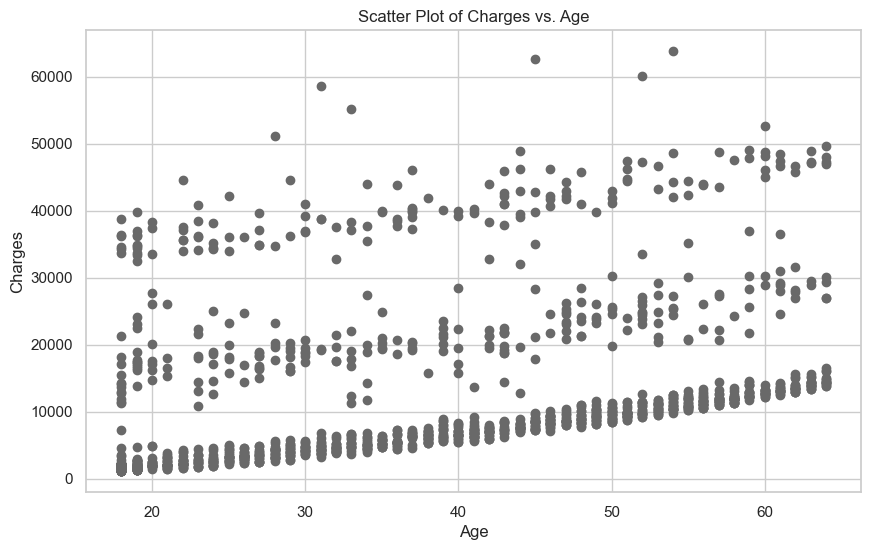

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.age, insurance.charges, marker="o", color="dimgray")

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age")

plt.show()
plt.close()

There appear to be three subgroups of charges that are consistent with every age. 
A group with lower charges, a group with median charges, and a group with higher charges.

Within each of these groups, higher charges are associated with higher age but the highest of the biggest group (the thicker one at the bottom), only reaches the next band at 65. 
Basically, we're talking about some factor that can give an 18 year old the medical problems of a 65 year old without that factor.

Here is a chart that flips the x and y axes and puts the charges histogram on top:

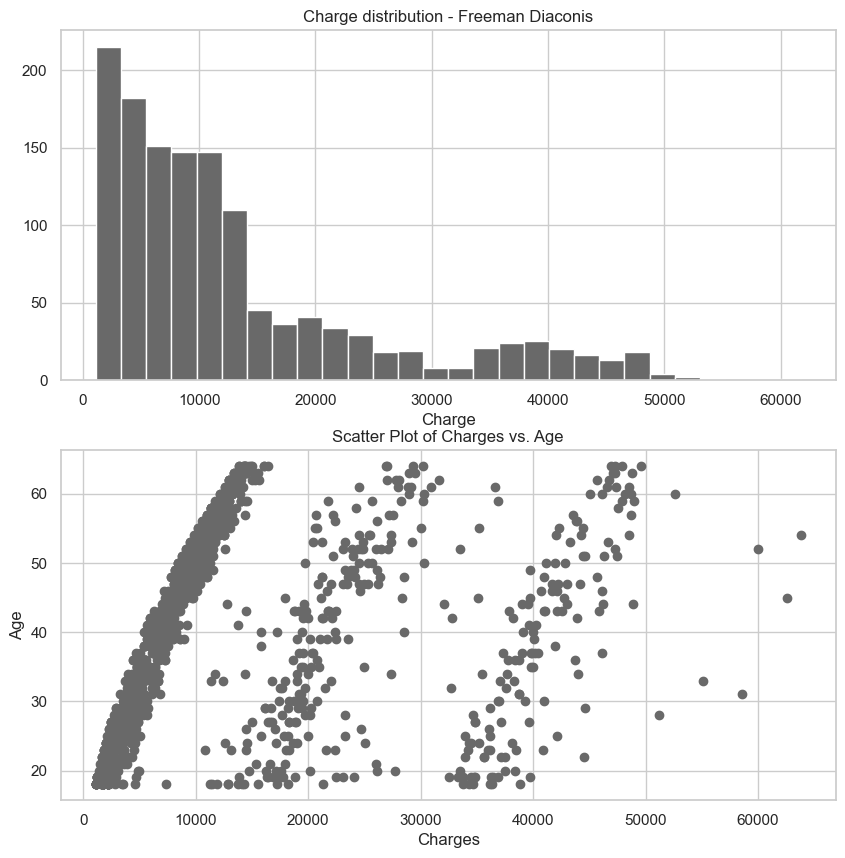

In [26]:
h = freeman_diaconis(insurance.charges)
mn = int(insurance.charges.min())
mx = int(insurance.charges.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 10))

axes = figure.add_subplot(2, 1, 1)
axes.hist(insurance.charges, bins=bins,color="dimgray")
axes.set_title("Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")

axes = figure.add_subplot(2, 1, 2)
axes.scatter( insurance.charges, insurance.age, marker="o", color="dimgray")

axes.set_ylabel("Age")
axes.set_xlabel("Charges")
axes.set_title("Scatter Plot of Charges vs. Age")

plt.show()
plt.close()

The bottom chart is just using age is a means of spreading out the upper chart like butter across toast. 
However, as we noticed, there seem to be three main groups here. 
None of our variables has three values which means we either do not have the variable or it is the intersection of multiple variables with 2 of the possibilities (male, smoker, high BMI; female, non-smoker, lots of children?) creating these two other subgroups.

<a id="v_sex"></a>
## Charges v. Sex

In the US and many other countries, women live longer than men.
One possible explanation for this is that women are more likely to avail themselves of health care services. 
Perhaps the distribution of charges is explained by sex: women using more health care services than men.

In [27]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

Here are the summary statistics for charges, grouped by sex:

In [28]:
describe_by_category(insurance, "charges", "sex", transpose=True)

sex          female          male
count    662.000000    676.000000
mean   12569.578844  13956.751178
std    11128.703801  12971.025915
min     1607.510100   1121.873900
25%     4885.158700   4619.134000
50%     9412.962500   9369.615750
75%    14454.691825  18989.590250
max    63770.428010  62592.873090


The summary statistics are inconclusive and we already know what pattern we're looking for. 
The female mean is \\$12,569 and the male mean is \\$13,956.
That's only a \\$1,400 difference.
The medians, \\$9,412 and \\$9,369 are closer and flip (the women's median is higher).

Here's is a side-by-side histogram of charges, by sex:

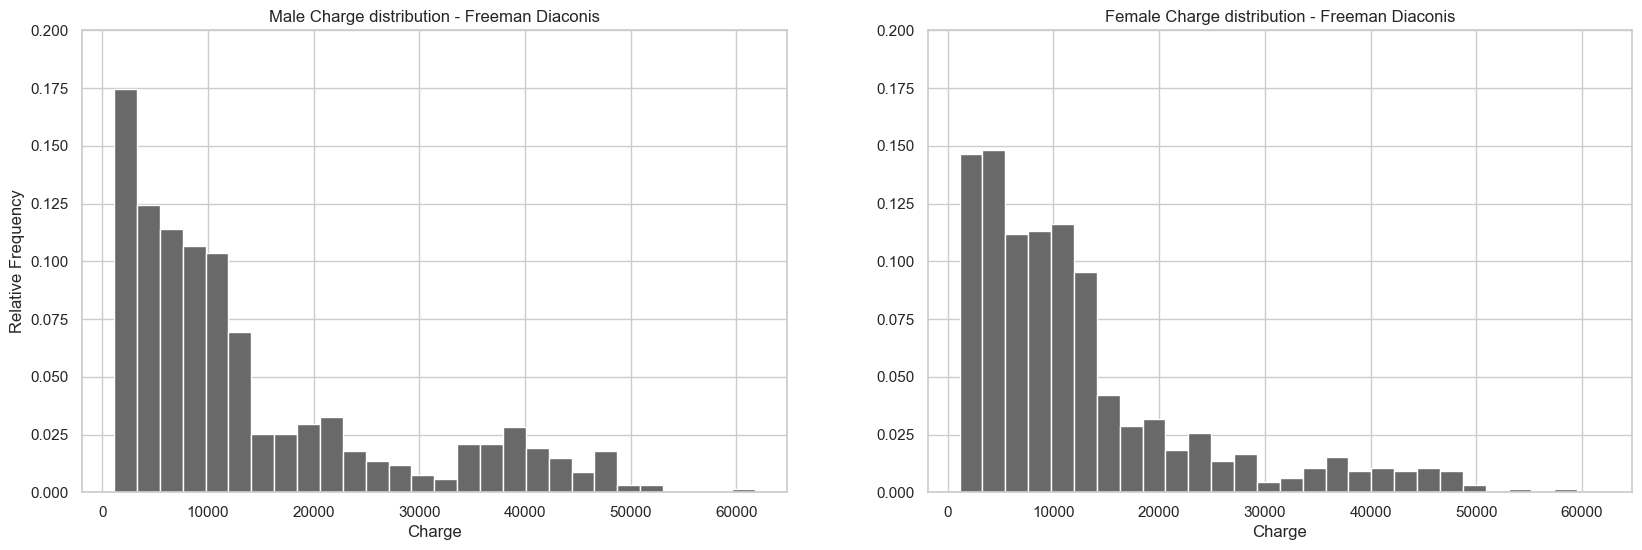

In [29]:
grouped = insurance.groupby("sex")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

observations = len(grouped["charges"].get_group("male"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["charges"].get_group("male"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Male Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))
axes.set_ylabel("Relative Frequency")

observations = len(grouped["charges"].get_group("female"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["charges"].get_group("female"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Female Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))

plt.show()
plt.close()

Whatever "it" is, men seem to have more of it. 
Of the 3 bands in earlier charts (lower, middle, high charges), there are more women in the lower band. 
There maybe more men in the middle band but there are definitely more men in the high band.

<a id="v_region"></a>
## Charges v. Region


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Warning</strong>
    <p>We really shouldn't use variables we don't understand. It's an imperfect world when you're using "found" data.</p>
</div>

How do charges vary by region?
Somewhat stereotypically, we might imagine that there the South is a little less concerned with health whereas the Northwest is more concerned with health and the great outdoors.
The resolution of the regions may be too great to either validate or invalidate the hypothesis.

Here are the summary statistics for charge, by region:

In [30]:
describe_by_category(insurance, "charges", "region", transpose=True)

region     northeast     northwest     southeast     southwest
count     324.000000    325.000000    364.000000    325.000000
mean    13406.384516  12417.575374  14735.411438  12346.937377
std     11255.803066  11072.276928  13971.098589  11557.179101
min      1694.796400   1621.340200   1121.873900   1241.565000
25%      5194.322288   4719.736550   4440.886200   4751.070000
50%     10057.652025   8965.795750   9294.131950   8798.593000
75%     16687.364100  14711.743800  19526.286900  13462.520000
max     58571.074480  60021.398970  63770.428010  52590.829390


There are not *huge* differences in the mean charges for each region.
However, the Southeast appears to have the highest mean charges \\$14,735 and the Southwest has the lowest mean charges \\$12,347.
It's a difference of about \\$2,400.
The mean for the Northeast is \\$13,406 and the mean for Northwest is \\$12,417.

Here are the histograms:

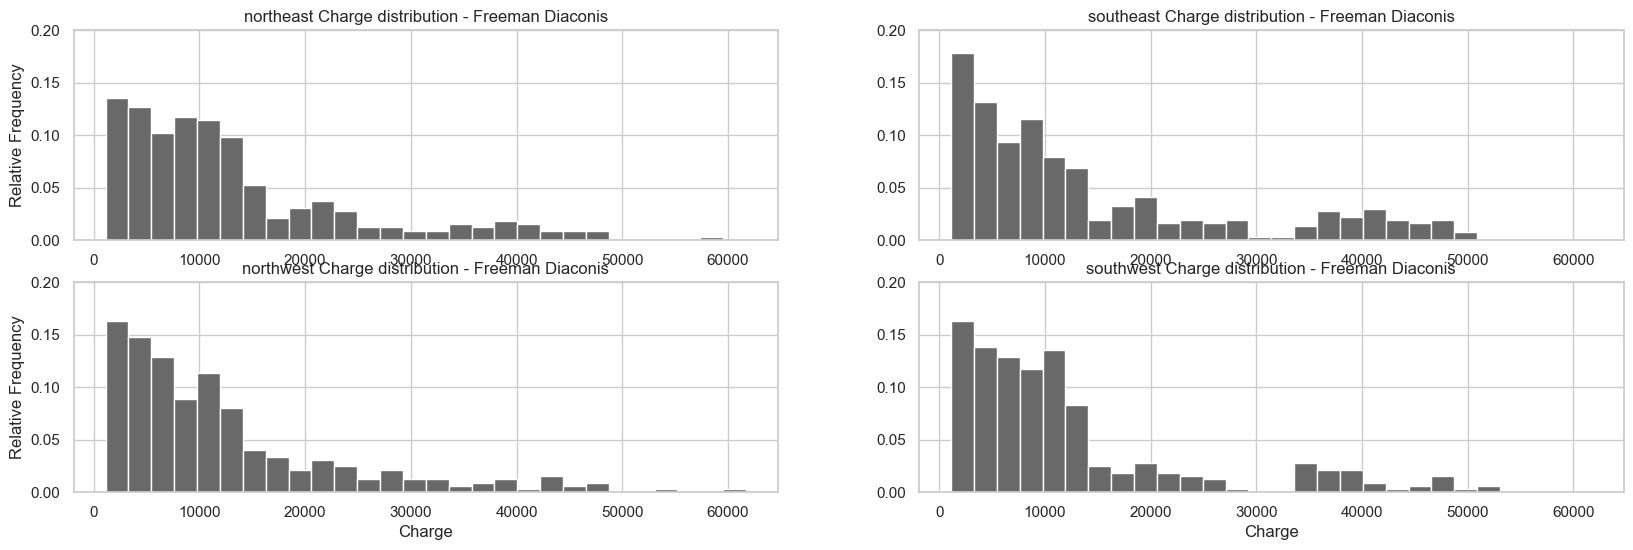

In [31]:
grouped = insurance.groupby("region")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(2, 2, 1)
observations = len(grouped["charges"].get_group("northeast"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["charges"].get_group("northeast"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("northeast Charge distribution - Freeman Diaconis")
axes.set_ylim((0,0.2))
axes.set_ylabel("Relative Frequency")

axes = figure.add_subplot(2, 2, 2)
observations = len(grouped["charges"].get_group("southeast"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("southeast"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("southeast Charge distribution - Freeman Diaconis")
axes.set_ylim((0,0.2))

axes = figure.add_subplot(2, 2, 3)
observations = len(grouped["charges"].get_group("northwest"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("northwest"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("northwest Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))
axes.set_ylabel("Relative Frequency")

axes = figure.add_subplot(2, 2, 4)
observations = len(grouped["charges"].get_group("southwest"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("southwest"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("southwest Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))

plt.show()
plt.close()

The distributions are not the same but region doesn't explain the variation.
That is, it appears that whatever does explain the variation in charges, the various regions appear to have different amounts of it.

1. If we want to dig deeper, we may need to get data by state or even a lower resolution.
2. Anything that explains charges, should also explain the variation in charges by region.
3. There may still be left over variation that is explained by region.

<a id="v_bmi"></a>
## Charges v. BMI

We have several other variables that we know are associated with differential health outcomes, BMI and smoking. 

Here are the correlation coefficients:

In [32]:
print("r   = ", stats.pearsonr( insurance.charges, insurance.bmi)[0])
print("rho = ", stats.spearmanr( insurance.charges, insurance.bmi)[0])

r   =  0.19834096883362887
rho =  0.11939590358331147


Both of these correlation coefficients indicate a weak correlation with charges.
Pearson's is 19.8% (weak) and Spearman's is 11.9% (very weak).

Here is a scatter plot of Charges v. BMI:

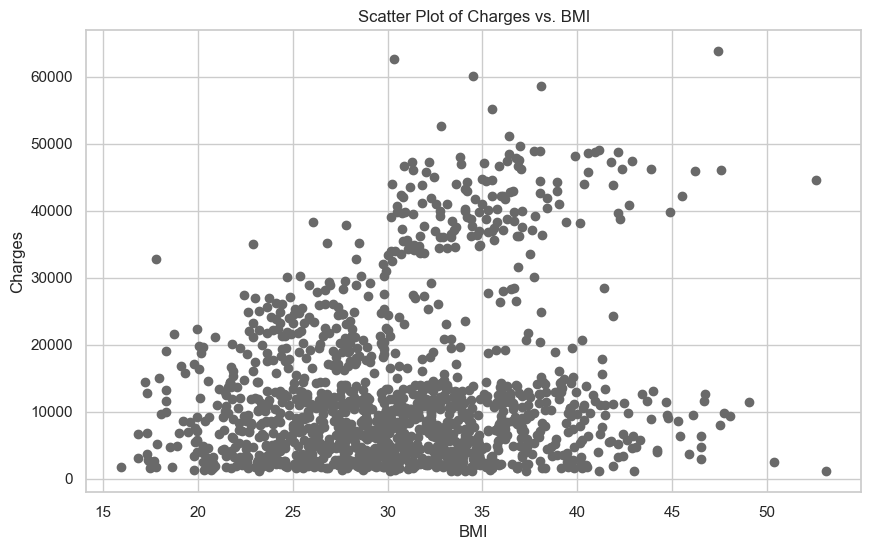

In [33]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( insurance.bmi, insurance.charges, marker="o", color="dimgray")

axes.set_ylabel("Charges")
axes.set_xlabel("BMI")
axes.set_title("Scatter Plot of Charges vs. BMI")

plt.show()
plt.close()

There seem to be two "bands" here.
The first band goes up and to the right.
The second band is much flatter and goes to the right.
There seems to be a whole range of BMI values across the board that do not lead to different charges and then there is another "world" where increasing BMI values do lead to increasing costs.


<a id="v_smoker"></a>
## Charges v. Smoker

We would definitely expect to see higher charges for smokers than non-smokers.

Here are the descriptive statistics for charges, by smoking:

In [34]:
describe_by_category(insurance, "charges", "smoker", transpose=True)

smoker            no           yes
count    1064.000000    274.000000
mean     8434.268298  32050.231832
std      5993.781819  11541.547176
min      1121.873900  12829.455100
25%      3986.438700  20826.244213
50%      7345.405300  34456.348450
75%     11362.887050  41019.207275
max     36910.608030  63770.428010


The mean charges for non-smokers is \\$8,434 while the mean charges for smokers is \\$32,050 (nearly 4x).
However, smoking can be influenced by other factors.
For example, you may have a young smoker, who doesn't show any health problems until their 40s.
More older Americans smoke than younger Americans so how do we tease apart the possibility that smoking causes more health problems...when it could just be that these are the health problems of older adults.
Conversely, how do we really know what the health problems of aging are in the absence of smoking?

Here is a histogram of charges, by smoker:

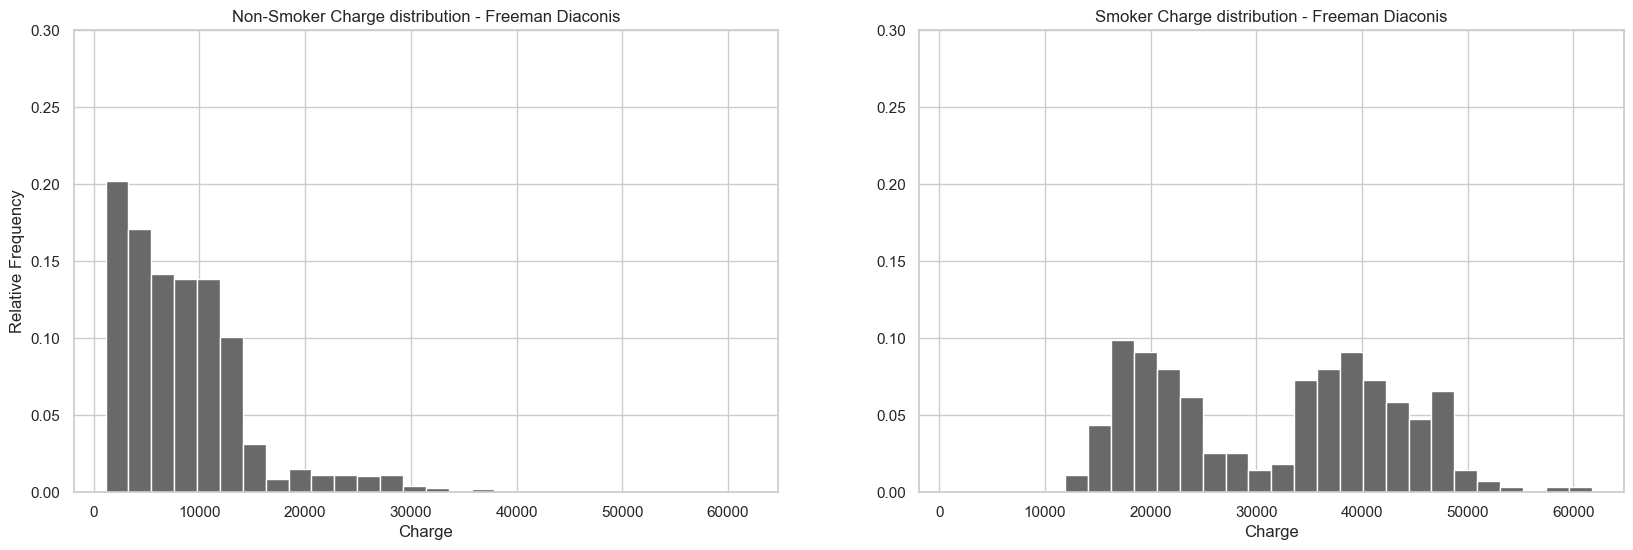

In [35]:
grouped = insurance.groupby("smoker")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
observations = len(grouped["charges"].get_group("no"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("no"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylabel("Relative Frequency")
axes.set_ylim((0,0.3))

axes = figure.add_subplot(1, 2, 2)
observations = len(grouped["charges"].get_group("yes"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("yes"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.3))

plt.show()
plt.close()

Smoking is definitely one of our factors but it is not the only factor. 
It is a characteristic shared by the middle band and the upper band.
But what factor creates the upper band?

1. Smoking definitely seems to be one of the factors that creates the stratification of charges.
2. Smoking is not the only factor, because even for those who smoke, there are still two peaks in the distribution.

<a id="v_children"></a>
## Charges v. Children
Looking at the age variable, we can see that there are no charges for anyone under 18.
This could suggest that charges for children are included on their parents accounts or it could mean that data about children are just not included.
It might also be the case that having more children takes a greater (worthwhile) toll on the body and people with more children have more health problems.

Here are the correlation coefficients:

In [36]:
print("r   = ", stats.pearsonr(insurance.charges, insurance.children)[0])
print("rho = ", stats.spearmanr(insurance.charges, insurance.children)[0])

r   =  0.06799822684790481
rho =  0.13333894319168219


There is a positive relationship but it is very weak.
Pearson's is 6.7% and Spearman's is 13.3%.
This is more likely to suggest the second hypothesis (more children have a slightly negative affect on physical health) rather than the first.

Here is a scatter plot of charges and children:

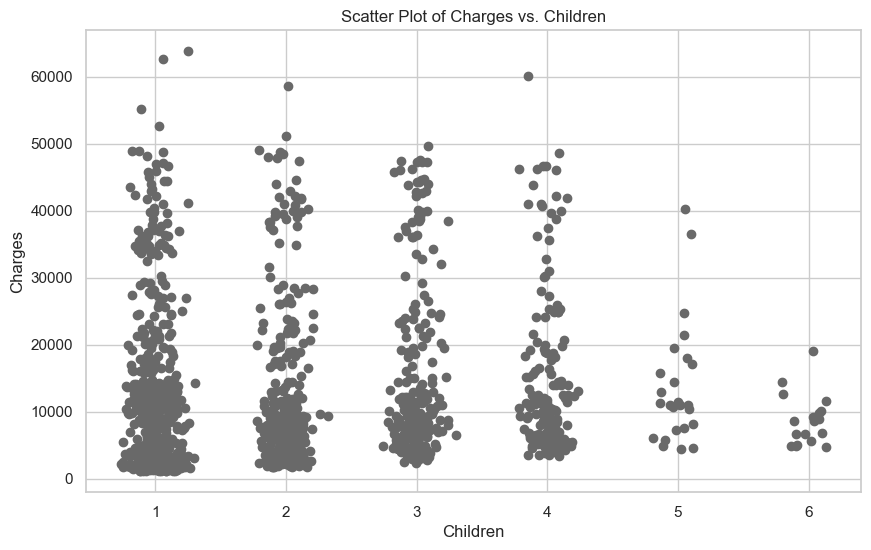

In [37]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
jitter = np.random.normal(1, 0.10, size=len(insurance.charges))

axes.scatter(insurance.children + jitter, insurance.charges, marker="o", color="dimgray")

axes.set_ylabel("Charges")
axes.set_xlabel("Children")
axes.set_title("Scatter Plot of Charges vs. Children")

plt.show()
plt.close()

The histogram shows why the correlation is weak.
Very few families have more than 4 children, most have none.
It's possible we just don't have enough domain knowledge to properly use the variable, if it does indeed contain any information.

## Digging Deeper

After we're done with the initial analysis, we can dig deeper into questions we have unearthed.
Let's look at smoking in more detail...

If we scroll back up, we can see that BMI seems to have two different outcomes. Can smoking be the determining factor for those two different outcomes? In such a scenario, we have three groups:

1. non-smoking, lower BMI
2. smoking or higher BMI
3. smoking and higher BMI

We'll use a BMI of 30 to start as the dividing line. Let's create a new variable, "obese", that is binary:

In [38]:
insurance["obese"] = insurance.bmi > 30

And now we can plot it:

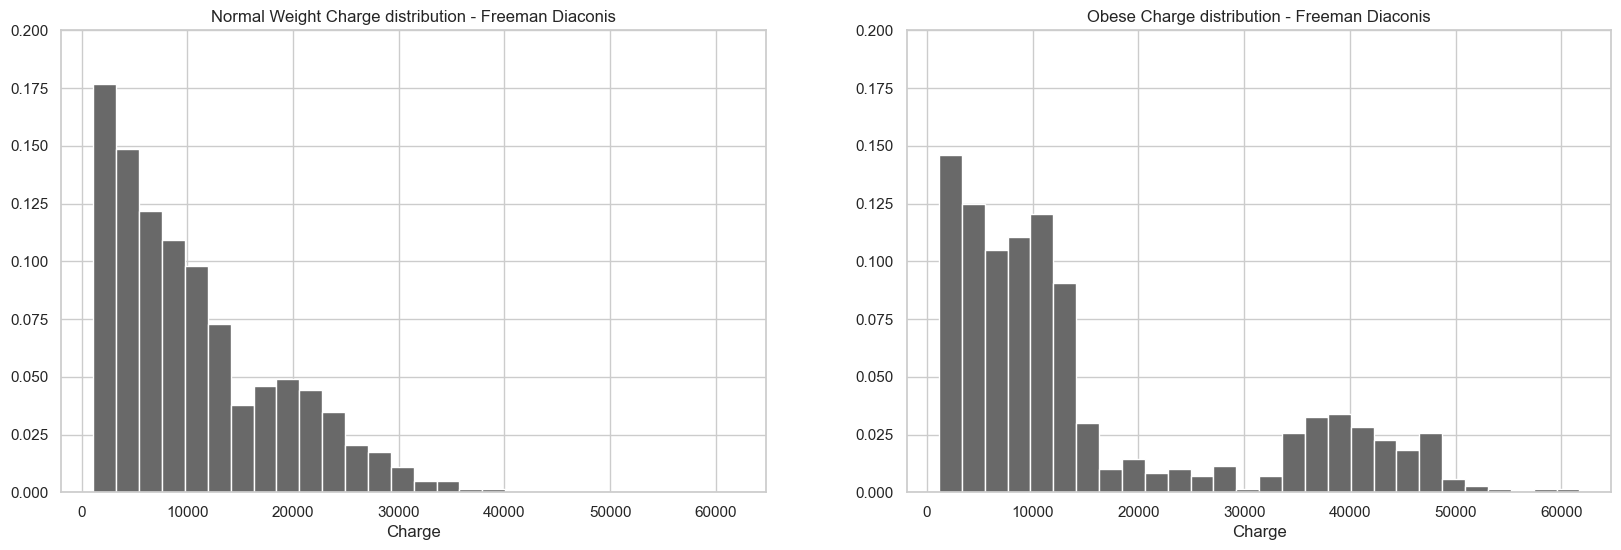

In [39]:
grouped = insurance.groupby("obese")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
observations = len(grouped["charges"].get_group(0))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["charges"].get_group(0),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Normal Weight Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))

axes = figure.add_subplot(1, 2, 2)
observations = len(grouped["charges"].get_group(1))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group(1),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Obese Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.2))

plt.show()
plt.close()

As we suspected, the normal weight cohorts are part of the first and middle band. The obese cohort is part of the first and higher band. Let's factor in smoking and create a "lifestyle" variable:

In [40]:
smoker = insurance.smoker == 'yes'
obese = insurance.obese == 1
high = smoker & obese
middle = smoker | obese

insurance["lifestyle"] = np.where(high, "high", np.where(middle , "middle", "low"))

And plot them:

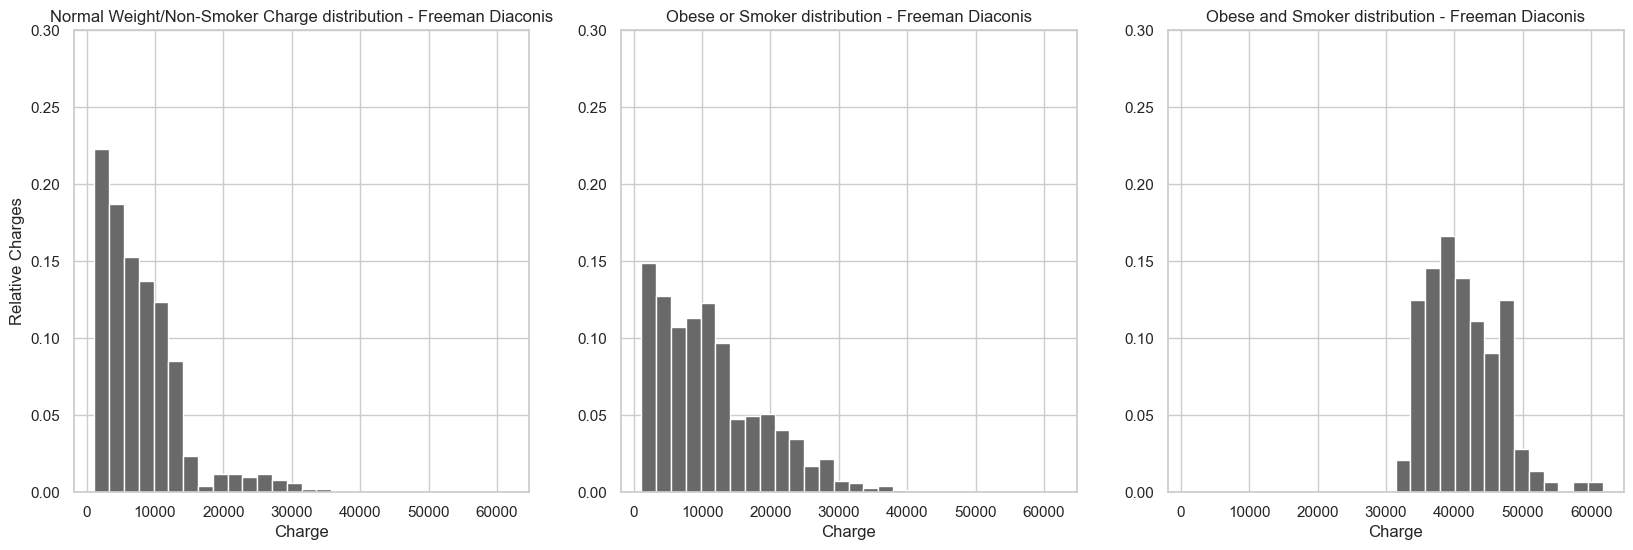

In [41]:
grouped = insurance.groupby("lifestyle")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
observations = len(grouped["charges"].get_group("low"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("low"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Normal Weight/Non-Smoker Charge distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.3))
axes.set_ylabel("Relative Charges")

axes = figure.add_subplot(1, 3, 2)
observations = len(grouped["charges"].get_group("middle"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("middle"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Obese or Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.3))

axes = figure.add_subplot(1, 3, 3)
observations = len(grouped["charges"].get_group("high"))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
axes.hist(grouped["charges"].get_group("high"),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("Obese and Smoker distribution - Freeman Diaconis")
axes.set_xlabel("Charge")
axes.set_ylim((0,0.3))

plt.show()
plt.close()

We appear to have cleanly split out the lower and the upper bands as normal weight, non-smokers and obese, smokers respectively. The middle band still seems to be a bit muddled. Let's look at the original chart with additional color for our "lifestyle" variable:

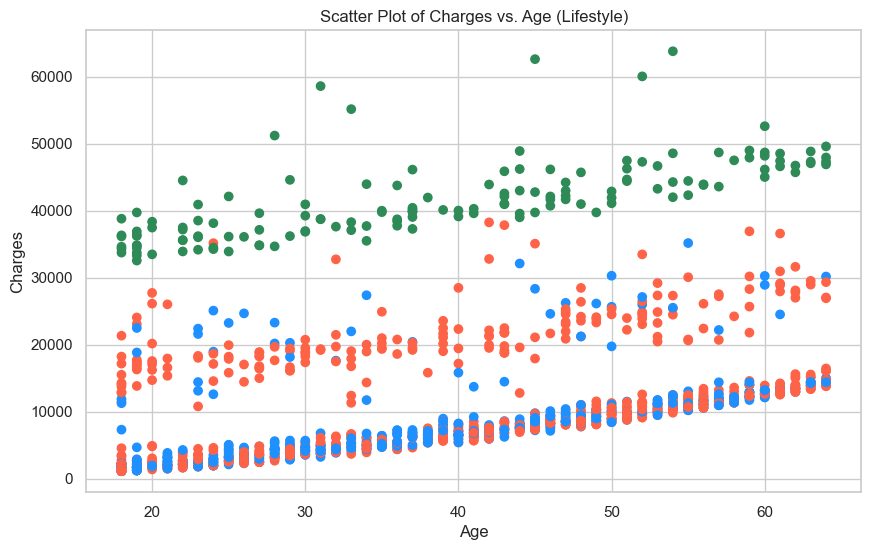

In [42]:
colors = insurance["lifestyle"].apply(lambda x: "DodgerBlue" if x == "low" else ("Tomato" if x == 'middle' else 'Seagreen'))

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(insurance.age, insurance.charges, marker="o", color=colors)

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Charges vs. Age (Lifestyle)")

plt.show()
plt.close()

This line of exploration needs a bit more work. There are several avenues of exploration open to us:

1. Explore other variables (children, sex).
2. Refine our "obese" measure.

Additionally, we might need to use more sophisticated modeling techniques.